# 1. Retreiving tweets

First, we'll need to make a dataset with politicians tweets

Because twitter API doesn't allow to retrieve tweets from a global search that are older than 7 days, we're gonna retrieve tweets from defined accounts where there is no time limit

In [ ]:
import tweepy
import numpy as np
import requests
import os
import json
from ast import literal_eval
import pandas as pd
import pickle

We created a twitter dev account to get credentials to use the twitter API

In [ ]:
BEARER_TOKEN= 'AAAAAAAAAAAAAAAAAAAAAN5kOgEAAAAAhA5CAmKwBm6ryges3kcS5yKElhE%3DPj3XmIfWEklF8LwIl7wn0CTVDf4SJseKfAoMb7glJTXmmvkmBX'
auth_params = {
    'app_key': 'FxO0uI01ELuZftZswaZJKg4S4',
    'app_secret': 'SoJ6M2kR71qYd41GSZ6zCzrZbB6BsfzrulIhHNRTBoRieqmokf',
    'oauth_token': '606449065-af64Ql3WSOuAigsbljONV5YLRm35yzbGN7QWI8K5',
    'oauth_token_secret': 'ts1JNzQUzln87KgnUfAAXYi99cNwuyPcBdgQF5a6QYW2d',
}

Then we'll define some basic functions that use Twitter API

In [ ]:
def get_user_id(screen_name):

    # authorization of consumer key and consumer secret
    auth = tweepy.OAuthHandler(auth_params['app_key'], auth_params['app_secret'])

    # set access to user's access key and access secret 
    auth.set_access_token(auth_params['oauth_token'],auth_params['oauth_token_secret'])

    # calling the api 
    api = tweepy.API(auth)

    # fetching the user
    user = api.get_user(screen_name)

    # fetching the ID
    ID = user.id_str

    return ID

def get_user_tweets(date,u_id,n):
    df = None
    for i in range(n):
        if df is None :
            df = pd.DataFrame(main(date,u_id)['data'])
        else :
            date = df['created_at'].iloc[-1]
            df = pd.concat([df,pd.DataFrame(main(date,u_id)['data'])],axis = 0)
    return df

# To set your environment variables in your terminal run the following line:

def auth():
    return BEARER_TOKEN


def create_url(u_id):
    # Replace with user ID below
    user_id =  u_id
    return "https://api.twitter.com/2/users/{}/tweets".format(user_id)


def get_params(date):
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    return {"tweet.fields": "created_at",'max_results':'100','end_time':date}


def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers


def connect_to_endpoint(url, headers, params):
    response = requests.request("GET", url, headers=headers, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


def main(date,u_id):
    bearer_token = auth()
    url = create_url(u_id)
    headers = create_headers(bearer_token)
    params = get_params(date)
    json_response = connect_to_endpoint(url, headers, params)
    return json_response


In [ ]:
date = '2021-04-07T18:23:01.000Z'

In [ ]:
user_tweets = {}

##  Users list

In [ ]:
keys_gauche = ['Anne_Hidalgo','montebourg',
       'partisocialiste','cestrosi','EELV','Clem_Autain','alexiscorbiere','Francois_Ruffin','ElsaFaucillon',
               'Deputee_Obono','JLMelenchon','FaureOlivier','MaximeCochard_']

keys_droite = ['xavierbertrand','ECiotti','laurentwauquiez','MLP_officiel',
       'lesRepublicains','RNational_off','dupontaignan','f_philippot','cestrosi','ChJacob77',
    'jclagarde','GeoffroyRDB','DamienRieu']

keys_lrem =['EmmanuelMacron','GDarmanin','BrunoLeMaire','MarleneSchiappa','JeanCASTEX']

keys = keys_droite + keys_gauche + keys_lrem
user_tweets['droite'] = keys_droite
user_tweets['gauche'] = keys_gauche
user_tweets['LREM'] = keys_lrem

In [ ]:
for key in keys :
    u_id = get_user_id(key)
    user_tweets[key] = get_user_tweets(date,u_id,10)
    print(user_tweets[key].head(1))

200
200
200
200
200
200
200
200
200
200
                 created_at  ...                                               text
0  2021-04-07T10:18:04.000Z  ...  RT @Faustine_Maliar: ✅ Heureuse d’avoir souten...

[1 rows x 3 columns]
200
200
200
200
200
200
200
200
200
200
                 created_at  ...                                               text
0  2021-04-07T16:53:43.000Z  ...  Notre devoir : ne  jamais oublier les crimes n...

[1 rows x 3 columns]
200
200
200
200
200
200
200
200
200
200
                 created_at  ...                                               text
0  2021-04-07T16:36:55.000Z  ...  Dans 2 jours, Alpexpo sera l’un des plus grand...

[1 rows x 3 columns]
200
200
200
200
200
200
200
200
200
200
                 created_at  ...                                               text
0  2021-04-07T15:10:59.000Z  ...  🖋 Répondant à l’objectif du Collectif @TenirTa...

[1 rows x 3 columns]
200
200
200
200
200
200
200
200
200
200
                 created_at  ...        

# 2. Cleaning database

In [ ]:
loaded_dictionary = user_tweets

Upgrade spacy for french database and install pyLDAvis for visualization 

In [ ]:
!pip install emoji
!pip install pyLDavis
!pip install --upgrade spacy

     |████████████████████████████████| 133kB 5.5MB/s 
     |████████████████████████████████| 1.7MB 4.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 248kB/s 
     |████████████████████████████████| 9.9MB 36.1MB/s 
  Created wheel for pyLDavis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=bed54414ecd6ea936e7deb8f5885da2bfe81f849b63d44a3dd62fe3e320fbe7b
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDavis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have foli

     |████████████████████████████████| 12.8MB 4.0MB/s 
     |████████████████████████████████| 9.1MB 45.5MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 1.1MB 44.5MB/s 
     |████████████████████████████████| 460kB 37.0MB/s 
     |████████████████████████████████| 122kB 48.8MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=5e2dfdc9d22f79a3a242fa5503679051176b866bb7eefa87c16bff4b2b4d4d93
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: smart-open 5.0.0
    Uninstalling smart-open-5.0.0:
      Successfully uninstalled smart-open-5.0.0
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-

In [ ]:
import emoji 
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
from gensim.models import Word2Vec
from multiprocessing import cpu_count
from tqdm.notebook import tqdm
from gensim.models.phrases import Phrases, Phraser
import re

nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cleaning the database by removing :
- hashtag
- url
- emojis
- retweet

In [ ]:
def remove_hashtags(tokens):
    tokens = map(lambda x: x.replace('#', ''), tokens)
    tokens = map(lambda x: x.replace('@', ''), tokens)
    return list(tokens)

def remove_url(tokens):
    tokens = filter(lambda x: "http" not in x, tokens)
    return list(tokens)

def remove_html(tokens):
    tokens = filter(lambda x: x[0]+x[-1] != '<>', tokens)
    return list(tokens)

def remove_emojis(tokens) :
    tokens = map(lambda x : emoji.demojize(x), tokens)
    return list(tokens)

def remove_rt (sentence) :
    s = re.search('rt \w* :', sentence)
    if s != None : 
        s = s.span()
        sentence = sentence[:s[0]] + sentence[s[1]:]
    return sentence 

def remove_text_emoji(sentence) :
    s = re.search(':\w*:', sentence)
    while s != None :
        s = s.span()
        sentence = sentence[:s[0]] + sentence[s[1]:]
        s = re.search(':\w*:', sentence)
    return sentence

def tokenize_url_hashtags(corpus, tweets=False):
    if tweets:
        tokenizer = TweetTokenizer()
    else:
        tokenizer = TreebankWordTokenizer()  
    # Life hack : treebank word tokenizer won't keep html code in one token.
    # To preprocess economics news corpus, use tweettokenizer. 
    tokenized_sentences = []
    for sample in tqdm(corpus):
    # separating sentences
        tokens_tot = ''
        for sentence in sent_detector.tokenize(sample):
            tokens = tokenizer.tokenize(sentence)
            tokens = remove_url(tokens)
            tokens = remove_html(tokens)
            tokens = remove_hashtags(tokens)
            tokens = remove_emojis(tokens)
            tokens = list(map(lambda x: x.lower(), tokens))
            save = ' '.join(tokens)
            save = remove_rt(save)
            save = remove_text_emoji(save)
            
            tokens_tot = tokens_tot + save
        tokenized_sentences.append(tokens_tot)
    
    return tokenized_sentences

In [ ]:
list_keys = list(loaded_dictionary.keys())
list_keys.pop(list(list_keys).index('droite'))
list_keys.pop(list(list_keys).index('gauche'))
list_keys.pop(list(list_keys).index('LREM'))

for key in list_keys :
    print(key)
    loaded_dictionary[key]['clean tweet'] = tokenize_url_hashtags(loaded_dictionary[key].text.array)

xavierbertrand



ECiotti



laurentwauquiez



MLP_officiel



lesRepublicains



RNational_off



dupontaignan



f_philippot



cestrosi



ChJacob77



jclagarde



GeoffroyRDB



DamienRieu



Anne_Hidalgo



montebourg



partisocialiste



EELV



Clem_Autain



alexiscorbiere



Francois_Ruffin



ElsaFaucillon



Deputee_Obono



JLMelenchon



FaureOlivier



MaximeCochard_



EmmanuelMacron



GDarmanin



BrunoLeMaire



MarleneSchiappa



JeanCASTEX


In [ ]:
loaded_dictionary[key]['clean tweet']

0     rt  emmanuelmacron : 250 millions de doses de ...
1     de la prise de rendez-vous à la première injec...
2     le centre qui a ouvert ses portes ce matin au ...
3     un indéfectible soutien et davantage de moyens...
4     alors que se conclut la semaine sainte pour no...
                            ...                        
95    rassemblant en un même lieu police nationale e...
96    nos policiers et nos gendarmes me l'ont dit ce...
97    les attaques indignes dont a fait l ’ objet  s...
98    ma méthode : aller sur le terrain et répondre ...
99    la forfaitisation des délits de stupéfiants , ...
Name: clean tweet, Length: 1000, dtype: object

In [ ]:
def label_data(loaded_dictionary):
    for key in loaded_dictionary.keys():
        if key in loaded_dictionary['droite']:
            loaded_dictionary[key]['label'] = ['droite' for i in range(len(loaded_dictionary[key]))]
            loaded_dictionary[key]['name'] = [key for i in range(len(loaded_dictionary[key]))]
        if key in loaded_dictionary['gauche']:
            loaded_dictionary[key]['name'] = [key for i in range(len(loaded_dictionary[key]))]
            loaded_dictionary[key]['label'] = ['gauche' for i in range(len(loaded_dictionary[key]))]
        if key in loaded_dictionary['LREM']:
            loaded_dictionary[key]['name'] = [key for i in range(len(loaded_dictionary[key]))]
            loaded_dictionary[key]['label'] = ['LREM' for i in range(len(loaded_dictionary[key]))]
    return loaded_dictionary

loaded_dictionary = label_data(loaded_dictionary)

In [ ]:



print(loaded_dictionary[key].columns)

Index(['created_at', 'id', 'text', 'clean tweet', 'name', 'label'], dtype='object')


# 3. ML approach

We predict the label 'droite' || 'gauche' by taking all the tweet for learning. We first clean the database then we use Word2vect for preprocessing.

In [ ]:
import pandas as pd
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import preprocessing
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Concatenating the dictionnary in order to create a proper pandas DF

In [ ]:
df = None
for key in loaded_dictionary.keys():
    if df is None and (key not in ['droite','gauche','LREM']):
        df = loaded_dictionary[key]
        
    elif key not in ['droite','gauche','LREM']:
        df = pd.concat([df,loaded_dictionary[key]],axis=0)

We store the database in order to use it later

In [ ]:
df.to_pickle('clean_db.pkl')
df = pd.read_pickle('clean_db.pkl')
print(df.columns) 

Index(['created_at', 'id', 'text', 'clean tweet', 'label', 'name', 'withheld'], dtype='object')


We'll first train and test solely on non-Lrem politicians

In [ ]:
df = df.loc[df.label != 'LREM'] 

In [ ]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
def tokenize_url_hashtags(corpus, tweets=False):
    tokenized_sentences = []
    tokenizer = TweetTokenizer()
    for sample in tqdm(corpus):
        for sentence in sent_detector.tokenize(sample):
            tokens = tokenizer.tokenize(sentence)
            tokens = list(map(lambda x: x.lower(), tokens))
            tokens = [l for l in tokens if l not in fr_stop]
            tokenized_sentences.append(tokens)
    return tokenized_sentences

In [ ]:
cleaned_pol = tokenize_url_hashtags(df['clean tweet'].array, tweets=True)

100%|██████████| 24916/24916 [00:04<00:00, 5381.23it/s]


# Word2Vec

In [ ]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count

cpu = cpu_count()
print('The virtual instance has {} cpus, that will be used to train the word2vec model'.format(cpu))

pol = Word2Vec(cleaned_pol, size=100, window=5, min_count=1, workers=cpu, sg=0)
pol.train(cleaned_pol, total_examples=len(cleaned_pol), epochs=100)
pol_wv = pol.wv

The virtual instance has 2 cpus, that will be used to train the word2vec model


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import numpy as np

def tokens2vectors(tokenCorpus, trained_word2vec, dim=100):
    ''' 
    transforms our X into a list of list of vec (2D array) 

    Args:
      tokenCorpus (list): corpus of tokens represented as a list of 
        tokenized texts in which each token is separated by a space.
    Returns:
        Numpy array representing the 2D array of token embeddings from the word2vec
        model pre-trained using Gensim (here pol_wv for political_wordvectors)
    '''
    new_sample = list()
    for sample in tokenCorpus:
        tweetVecs = list()
        for token in sample.split(' '):
            try: tweetVecs.append(trained_word2vec.get_vector(token)  )
            except: tweetVecs.append( np.zeros(dim) ) 
        new_sample.append(np.mean(tweetVecs, axis=0))
    return np.array(new_sample)

X = tokens2vectors(df.loc[:, "clean tweet"], pol_wv)

# Unsupervised learning using KMEANS







In [ ]:
from sklearn.cluster import KMeans
# this example uses only 3 initializations to be fast (but less effective!)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=20, max_iter=300, verbose=1).fit(X)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 218299.306526948
start iteration
done sorting
end inner loop
Iteration 1, inertia 205035.53331787285
start iteration
done sorting
end inner loop
Iteration 2, inertia 200238.14612304035
start iteration
done sorting
end inner loop
Iteration 3, inertia 197556.84343648283
start iteration
done sorting
end inner loop
Iteration 4, inertia 196051.2567188092
start iteration
done sorting
end inner loop
Iteration 5, inertia 195233.82372427845
start iteration
done sorting
end inner loop
Iteration 6, inertia 194834.18334387618
start iteration
done sorting
end inner loop
Iteration 7, inertia 194626.4003673668
start iteration
done sorting
end inner loop
Iteration 8, inertia 194514.43607550533
start iteration
done sorting
end inner loop
Iteration 9, inertia 194455.76218963013
start iteration
done sorting
end inner loop
Iteration 10, inertia 194425.2140761364
start iteration
done sorting
end inner loop
Iteration 11

In [ ]:
from sklearn.cluster import KMeans

# use the model to predict clusters
clusters = kmeans.predict(X)


# display some cluster related info
from collections import Counter 
print('Clusters:', clusters, 'of type', type(clusters))
print('Here is the occurrence counts for each cluster:')
for k,v in dict(Counter(clusters)).items(): print('cluster', k, 'has', v, 'elements')
clusterTendancies = {'droite':list(),'gauche': list()}
for text, sentiment, cluster in list(zip(df.loc[:, "clean tweet"], df.label, clusters)):
  clusterTendancies[sentiment].append(cluster)
clusterTendancies = { k:Counter(v) for k,v in clusterTendancies.items() }
print('clusters distribution accross sentiments')
print(clusterTendancies)

print(df.loc[:, "clean tweet"].shape, 'hey', clusters.shape)

# Quantitative evaluation
from sklearn.metrics.cluster import v_measure_score
label2id = {'droite':0, 'gauche':1}
y_true = np.array([ label2id[sentiment] for sentiment in df.label ])
print('v_measure score:', v_measure_score(y_true, clusters))

Clusters: [1 0 0 ... 1 0 1] of type <class 'numpy.ndarray'>
Here is the occurrence counts for each cluster:
cluster 1 has 13780 elements
cluster 0 has 11136 elements
clusters distribution accross sentiments
{'droite': Counter({0: 6617, 1: 5324}), 'gauche': Counter({1: 8456, 0: 4519})}
(24916,) hey (24916,)
v_measure score: 0.03120597487133502


Results are indeed not great

# Supervised learning using SVM



## Preprocessing

In [ ]:
def tokenize_url_hashtags_4tweets(corpus):
    ''' modified version for our data structure (flattened and only for tweets proc)'''
    tokenizer = TweetTokenizer() 
    tokenized_sentences = []
    for sample in tqdm(corpus):
        ## we remove sentence split as we need to keep the whole tweet as one
        tokens = tokenizer.tokenize(sample)
        tokens = list(map(lambda x: x.lower(), tokens))
        tokens = [l for l in tokens if l not in fr_stop]
        tokenized_sentences.append(tokens)
        
    return tokenized_sentences

We just train the database on Non-LREM tweets in order to label them with classic political parties standards

In [ ]:
df_train = df.loc[df.label != 'LREM']

In [ ]:
X = tokenize_url_hashtags_4tweets(df_train['clean tweet'].array)
X = [' '.join(x) for x in X]
y = df_train.label
print(len(X), X[0])


100%|██████████| 24916/24916 [00:03<00:00, 7521.44it/s]

24916 rt faustine_maliar : heureuse d ’ soutenu démarche conseillère régionale votant 150 000 € projet escoe …


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Using count vectorizer

In [ ]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

lb = preprocessing.LabelBinarizer()
lb_trained = lb.fit(y_train)
y_train_lb = lb_trained.transform(y_train)
y_test_lb = lb_trained.transform(y_test)

### Training model - SVM

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear', probability=True)

clf_svm = OneVsRestClassifier(svc).fit(X_train_cv, y_train_lb)

In [ ]:
y_pred_svm = clf_svm.predict(X_test_cv)
y_score_svm = clf_svm.decision_function(X_test_cv)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sn

def show_eval(y_true, y_pred, lb_trained, clf):
    ''' 
    Show eval metrics.  Takes binarized y true and pred along with trained binarizer for label names
    '''
    y_true_names = lb_trained.inverse_transform(y_true)
    y_pred_names = lb_trained.inverse_transform(y_pred)
    print( classification_report(y_true_names, y_pred_names) )
    cm = confusion_matrix(y_true_names, y_pred_names) 
    labels = ['droite','gauche']
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    # config plot sizes
    sn.set(font_scale=1.2)
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
    plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    print(labels[1], roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for '+labels[0])
    plt.legend(loc="lower right")
    plt.show()


              precision    recall  f1-score   support

      droite       0.75      0.95      0.84      4781
      gauche       0.94      0.71      0.81      5186

    accuracy                           0.83      9967
   macro avg       0.84      0.83      0.82      9967
weighted avg       0.85      0.83      0.82      9967



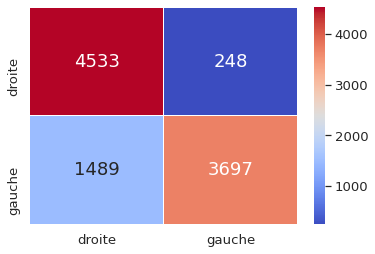

gauche 0.9399271387989464


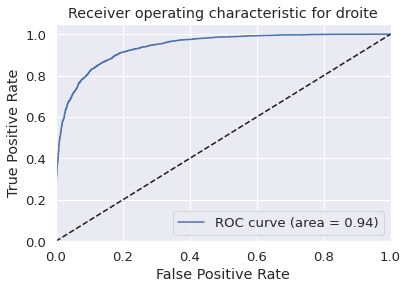

In [ ]:
show_eval(y_test_lb, y_score_svm, lb_trained, clf_svm)

### Training model - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1, verbose=1)
rfc.fit(X_train_cv, y_train_lb)

y_pred_rfc = rfc.predict(X_test_cv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   55.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    2.3s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


y_score_rfc new shape (2, 9967)
              precision    recall  f1-score   support

      droite       0.88      0.80      0.83      4781
      gauche       0.83      0.90      0.86      5186

    accuracy                           0.85      9967
   macro avg       0.85      0.85      0.85      9967
weighted avg       0.85      0.85      0.85      9967



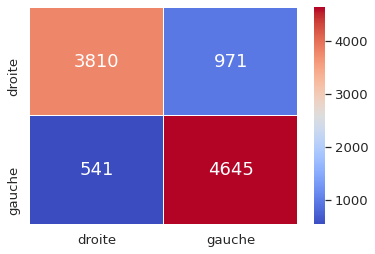

gauche 0.9233521371433216


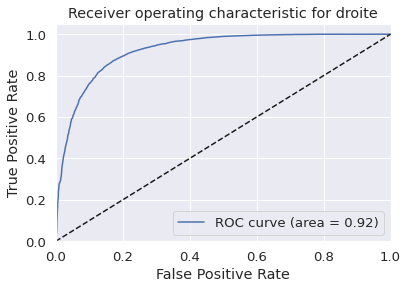

In [ ]:
y_score_rfc = rfc.predict_proba(X_test_cv) # you can also try .predict_log_proba(X_dev_cv)
y_score_rfc = np.array(y_score_rfc)

classes_proba = (class_binary_proba for class_binary_proba in y_score_rfc)
y_score_rfc = np.column_stack(classes_proba)
print('y_score_rfc new shape', y_score_rfc.shape)

show_eval(y_test_lb, y_score_rfc[1,:], lb_trained, rfc )

## Using Word2Vec

In [ ]:
def tokens2vectors(tokenCorpus):
  ''' transforms our X into a list of list of vec (2D array) '''
  new_sample = list()
  for sample in tokenCorpus:
    tweetVecs = list()
    for token in sample.split(' '):
      try: tweetVecs.append(pol_wv.get_vector(token)  )
      except: tweetVecs.append( np.zeros(100) ) 
    new_sample.append(np.mean(tweetVecs, axis=0))
  return np.array(new_sample)


In [ ]:
X_train_vec = tokens2vectors(X_train)
print(X_train_vec.shape, X_train_cv.shape)
X_test_vec = tokens2vectors(X_test)


(14949, 100) (14949, 37809)


In [ ]:
svc = svm.SVC(kernel='linear', probability=True)
clf_svm2 = OneVsRestClassifier(svc)
clf_svm2 = clf_svm2.fit(X_train_vec, y_train_lb)

              precision    recall  f1-score   support

      droite       0.68      0.85      0.76      4781
      gauche       0.82      0.63      0.71      5186

    accuracy                           0.74      9967
   macro avg       0.75      0.74      0.73      9967
weighted avg       0.75      0.74      0.73      9967



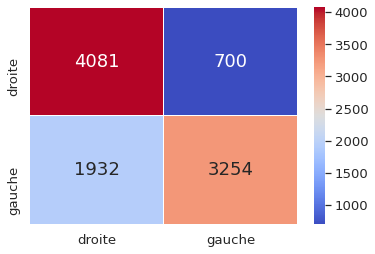

gauche 0.8368177343906854


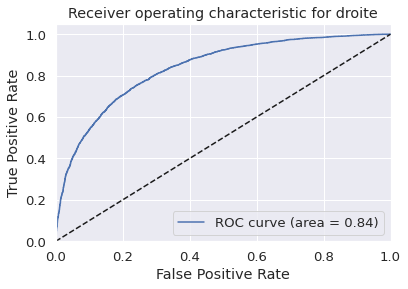

In [ ]:
y_score_svm = clf_svm2.decision_function(X_test_vec)
show_eval(y_test_lb, y_score_svm, lb_trained, svm )

In [ ]:
rfc2 = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1, verbose=1)
rfc2.fit(X_train_vec, y_train_lb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   33.8s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

      droite       0.78      0.76      0.77      4781
      gauche       0.78      0.80      0.79      5186

    accuracy                           0.78      9967
   macro avg       0.78      0.78      0.78      9967
weighted avg       0.78      0.78      0.78      9967



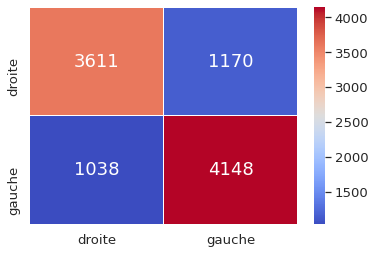

gauche 0.8542675754144122


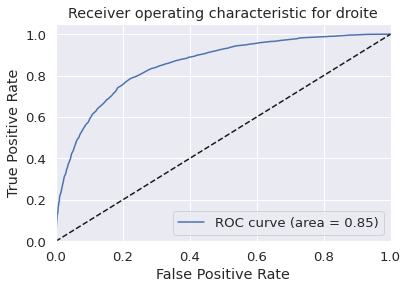

In [ ]:
y_score_rfc = rfc2.predict_proba(X_test_vec)
y_score_rfc = np.array(y_score_rfc) 
classes_proba = (class_binary_proba for class_binary_proba in y_score_rfc)
y_score_rfc = np.column_stack(classes_proba)

show_eval(y_test_lb, y_score_rfc[1,:], lb_trained, rfc )

## 3.2. Testing with LREM politicians



In [ ]:
my_file = pd.read_pickle('clean_db.pkl')
df_lrem = my_file.loc[my_file.label == 'LREM']

In [ ]:
X = tokenize_url_hashtags_4tweets(df_lrem['clean tweet'].array)
X = [' '.join(x) for x in X]
print(len(X), X[0])

100%|██████████| 5000/5000 [00:00<00:00, 8326.27it/s]

5000 renforcement systèmes santé , meilleure répartition capacités production vaccins grâce transferts technologie , transparence contrats , partage doses : montée puissance indispensable sécurité collective face risques variants .


In [ ]:
for key in df_lrem.name.unique():
    df_key = df_lrem.loc[(df_lrem.name == key)]
    X = tokenize_url_hashtags_4tweets(df_key['clean tweet'].array)
    X = [' '.join(x) for x in X]
    X = cv.transform(X)

    y_score_rfc = rfc.predict(X)
    df_key['predicted_label'] = y_score_rfc
    print(key,df_key.predicted_label.mean())


100%|██████████| 1000/1000 [00:00<00:00, 6240.46it/s]
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 1000/1000 [00:00<00:00, 7906.80it/s]
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


EmmanuelMacron 0.558


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.4s finished
100%|██████████| 1000/1000 [00:00<00:00, 8127.25it/s]
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


GDarmanin 0.579


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.4s finished
100%|██████████| 1000/1000 [00:00<00:00, 8804.35it/s]
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


BrunoLeMaire 0.502


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.4s finished
100%|██████████| 1000/1000 [00:00<00:00, 7598.20it/s]

MarleneSchiappa 0.771



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


JeanCASTEX 0.599


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.3s finished


We can see here that members of the government have scores in $[0.4,0.6]$ so we can't conclude much

In [ ]:
for key in df_lrem.name.unique():
    df_key = df_lrem.loc[(df_lrem.name == key)]
    X = tokenize_url_hashtags_4tweets(df_key['clean tweet'].array)
    X = [' '.join(x) for x in X]
    X = cv.transform(X)

    y_score_rfc = clf_svm.predict(X)
    df_key['predicted_label'] = y_score_rfc
    print(key,df_key.predicted_label.mean())


100%|██████████| 1000/1000 [00:00<00:00, 8372.06it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 1000/1000 [00:00<00:00, 7591.76it/s]


EmmanuelMacron 0.466


100%|██████████| 1000/1000 [00:00<00:00, 8167.72it/s]

GDarmanin 0.395



100%|██████████| 1000/1000 [00:00<00:00, 9221.37it/s]

BrunoLeMaire 0.42



100%|██████████| 1000/1000 [00:00<00:00, 7430.68it/s]

MarleneSchiappa 0.597


JeanCASTEX 0.517


With SVM, results are slightly better but not even one politicians can be classified as strictly right or left wing

# 4. Clustering by topics using LSA to improve performances

by creating categories for tweets we would like to train ours models on specific categories for better results.

In [ ]:
!pip install emoji
!pip install --upgrade spacy
!python -m spacy download fr_core_news_sm

Requirement already up-to-date: spacy in /usr/local/lib/python3.7/dist-packages (3.0.6)
2021-04-24 14:37:35.399513: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 17.3MB 228kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
import pickle
import emoji 
import re
import numpy as np
import spacy
import nltk
import pandas as pd
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
import pyLDAvis

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from multiprocessing import cpu_count
from gensim.models.phrases import Phrases, Phraser

from tqdm.notebook import tqdm

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
my_stopwords = nltk.corpus.stopwords.words('french')

nlp = spacy.load('fr_core_news_sm')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
my_file = pd.read_pickle('clean_db.pkl')

In [ ]:
keys_droite = ['xavierbertrand','ECiotti','laurentwauquiez','MLP_officiel',
       'lesRepublicains','RNational_off','dupontaignan','f_philippot','cestrosi','ChJacob77',
    'jclagarde']
keys_gauche = ['Anne_Hidalgo','montebourg',
       'partisocialiste','cestrosi','EELV',
       'Clem_Autain','alexiscorbiere','Francois_Ruffin','ElsaFaucillon','Deputee_Obono']

In [ ]:
#prend quelques minutes à tourner

def remove_hashtags(tokens):
    tokens = map(lambda x: x.replace('#', ''), tokens)
    tokens = map(lambda x: x.replace('@', ''), tokens)
    return list(tokens)

def remove_url(tokens):
    tokens = filter(lambda x: "http" not in x, tokens)
    return list(tokens)

def remove_html(tokens):
    tokens = filter(lambda x: x[0]+x[-1] != '<>', tokens)
    return list(tokens)

def remove_emojis(tokens) :
    tokens = map(lambda x : emoji.demojize(x), tokens)
    return list(tokens)

def remove_rt (sentence) :
    s = re.search('rt \w* :', sentence)
    if s != None : 
        s = s.span()
        sentence = sentence[:s[0]] + sentence[s[1]:]
    return sentence 

def remove_text_emoji(sentence) :
    s = re.search(':\w*:', sentence)
    while s != None :
        s = s.span()
        sentence = sentence[:s[0]] + sentence[s[1]:]
        s = re.search(':\w*:', sentence)
    return sentence

def tokenize_url_hashtags(corpus, tweets=False):
    if tweets:
        tokenizer = TweetTokenizer()
    else:
        tokenizer = TreebankWordTokenizer()  
    # Life hack : treebank word tokenizer won't keep html code in one token.
    # To preprocess economics news corpus, use tweettokenizer. 
    tokenized_sentences = []
    for sample in tqdm(corpus):
    # separating sentences
        tokens_tot = ''
        for sentence in sent_detector.tokenize(sample):
            tokens = tokenizer.tokenize(sentence)
            tokens = remove_url(tokens)
            tokens = remove_html(tokens)
            tokens = remove_hashtags(tokens)
            tokens = remove_emojis(tokens)
            tokens = list(map(lambda x: x.lower(), tokens))
            save = ' '.join(tokens)
            save = remove_rt(save)
            save = remove_text_emoji(save)
            tokens_tot = tokens_tot + save
        tokenized_sentences.append(tokens_tot)
    
    return tokenized_sentences



clean_tweets = tokenize_url_hashtags(my_file.text.array, tweets=True)


<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:28: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:28: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:28: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:28: DeprecationWarning: invalid escape sequence \w
<input>:32: DeprecationWarning: invalid escape sequence \w
<input>:21: DeprecationWarning: invalid escape sequence \w
<input>:28: DeprecationWarning: invalid escape sequence \w
<input>:32: DeprecationWarning: invalid escape sequence 

In [ ]:
my_file['clean tweet'] = clean_tweets
print(my_file.tail())

                  created_at                   id  ...        name withheld
95  2020-07-25T17:46:38.000Z  1287081842479431680  ...  JeanCASTEX      NaN
96  2020-07-25T16:54:54.000Z  1287068822072066048  ...  JeanCASTEX      NaN
97  2020-07-25T13:02:35.000Z  1287010356309762048  ...  JeanCASTEX      NaN
98  2020-07-25T11:25:58.000Z  1286986045402341376  ...  JeanCASTEX      NaN
99  2020-07-25T11:09:30.000Z  1286981900012322817  ...  JeanCASTEX      NaN

[5 rows x 7 columns]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer

import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

output_notebook()


In [ ]:
corpus = my_file['clean tweet'].array

In [ ]:
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
def remove_stop_words(token, stop_words) :
    new_token = []
    for word in token :
      if word not in stop_words :
        new_token.append(word)
    return new_token

def tokenize_stop_words(corpus, stop_words, tweets=False):
    if tweets:
        tokenizer = TweetTokenizer()
    else:
        tokenizer = TreebankWordTokenizer()  
    # Life hack : treebank word tokenizer won't keep html code in one token.
    # To preprocess economics news corpus, use tweettokenizer. 
    tokenized_sentences = []
    for sample in tqdm(corpus):
    # separating sentences
        tokens_tot = ''
        for sentence in sent_detector.tokenize(sample):
            tokens = tokenizer.tokenize(sentence)
            tokens = remove_stop_words(tokens, stop_words)
            save = ' '.join(tokens)
            tokens_tot = tokens_tot + save
        tokenized_sentences.append(tokens_tot)
    
    return tokenized_sentences

In [ ]:
def lemmatization(corp, tags = ['NOUN', 'ADV', 'ADJ', 'VERB']) :
    output_text = []
    for tweet in corp :
        doc = nlp(tweet)
        new_text = []
        for token in doc :
          if token.pos_ in tags :
              new_text.append(token.lemma_)
        final = ' '.join(new_text)
        output_text.append(final)
    return(output_text)

In [ ]:
def pre_get_top_n_words(stop_words, text_data, n):
    dico_data = {}
    tokenizer = TweetTokenizer()
    for tweet in text_data :
      token = tokenizer.tokenize(tweet)
      for word in token :
        dico_data[word] = dico_data.get(word, 0) + 1


    words = list(dico_data.keys())
    my_top_list = [[word, dico_data[word]] for word in words[:n]]
    for word in words :
      if dico_data[word]  > min([my_top_list[i][1] for i in range(n)]):
        my_top_list[np.array([my_top_list[i][1] for i in range(n)]).argmin()] = [word, dico_data[word]]
    return (dico_data, my_top_list)

We focus on the nouns in tweets to create categories.

In [ ]:
new_corpus = lemmatization(corpus, tags = ['NOUN'])

In [ ]:
dico, top_n = pre_get_top_n_words(my_stopwords, new_corpus, 50)


We use the LSA model to create vectors from tweets. We decided to create 5 topics.

In [ ]:
small_count_vectorizer = CountVectorizer(stop_words=my_stopwords, max_features=40000)
term_matrix = small_count_vectorizer.fit_transform(new_corpus)
n_topics = 5
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(term_matrix)

In [ ]:
from collections import Counter
def get_keys(topic_matrix):
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [ ]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)
        top_words.append(" ".join(topic_words))         
    return top_words

Here we can see the top 10 worlds for each topic.

In [ ]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  france crise pays merci face pourcent français soutien jour entreprise
Topic 2:  home world hello consommon hecho contemporáneo venezuela колегою екон magnifiquefrance
Topic 3:  an jour euro pourcent vie enfant personne hommage famille milliard
Topic 4:  loi république projet proposition liberté policier sécurité principe droit texte
Topic 5:  gouvernement français crise mesure vaccination an proposition temps mois loi


You can try to label your own tweet for exemple 'le président va prendre un décision ce soir'.

In [ ]:
str_lem = lemmatization(['le président va prendre un décision ce soir'], tags = ['NOUN'])
tr_test = lsa_model.transform(small_count_vectorizer.transform(str_lem))
get_keys(tr_test)

[0]

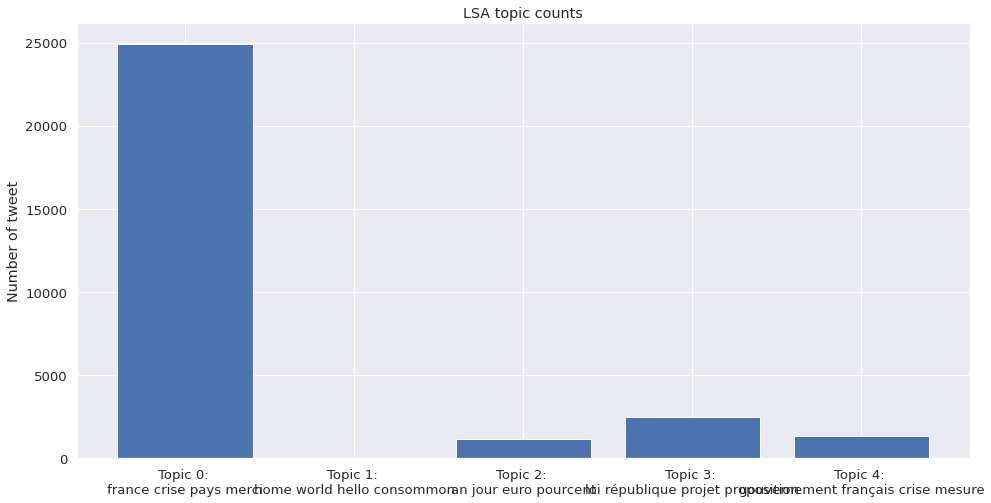

In [ ]:
top_3_words = get_top_n_words(4, lsa_keys, term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of tweet');
ax.set_title('LSA topic counts');
plt.show()

TRo visualize with pyLDAvis, the output of the classification we reduce the complexity of the model using TSNE with 3 components. 

In [ ]:
tsne_lsa_model = TSNE(n_components=3, perplexity=100, learning_rate=100, 
                        n_iter=700, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 29916 samples in 0.025s...
[t-SNE] Computed neighbors for 29916 samples in 4.022s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29916
[t-SNE] Computed conditional probabilities for sample 2000 / 29916
[t-SNE] Computed conditional probabilities for sample 3000 / 29916
[t-SNE] Computed conditional probabilities for sample 4000 / 29916
[t-SNE] Computed conditional probabilities for sample 5000 / 29916
[t-SNE] Computed conditional probabilities for sample 6000 / 29916
[t-SNE] Computed conditional probabilities for sample 7000 / 29916
[t-SNE] Computed conditional probabilities for sample 8000 / 29916
[t-SNE] Computed conditional probabilities for sample 9000 / 29916
[t-SNE] Computed conditional probabilities for sample 10000 / 29916
[t-SNE] Computed conditional probabilities for sample 11000 / 29916
[t-SNE] Computed conditional probabilities for sample 12000 / 29916
[t-SNE] Computed conditional probabilities for sa

In [ ]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [ ]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [ ]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color='black')
    plot.add_layout(label)

show(plot)


WE can see that a majority of tweets id labelled 0. Training models on the others topics implies a small database and unreliable results. Nevertheless we can tale a look at the models results considering the different topics. For each tweet of the LREM we predict the label of the topic then we use the model trained on the specific topic to predict 'gauche' || 'droite'. As few tweets are labelled as 1 we remote this topic from our study.

In [ ]:
labels = get_keys(lsa_model.transform(small_count_vectorizer.transform(new_corpus)))

In [ ]:

my_file['topic label'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   43.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    2.2s finished
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of Num

y_score_rfc new shape (2, 8298)
              precision    recall  f1-score   support

      droite       0.81      0.78      0.79      4067
      gauche       0.79      0.83      0.81      4231

    accuracy                           0.80      8298
   macro avg       0.80      0.80      0.80      8298
weighted avg       0.80      0.80      0.80      8298



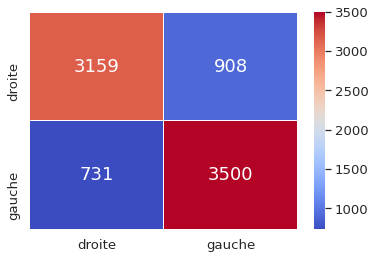

gauche 0.8846404676292754


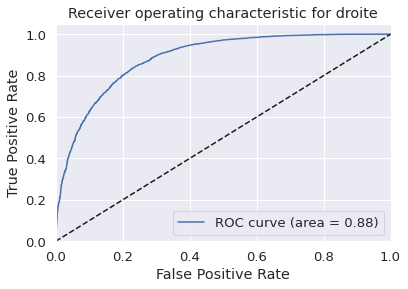

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of Num

y_score_rfc new shape (2, 397)
              precision    recall  f1-score   support

      droite       0.87      0.38      0.52       210
      gauche       0.57      0.94      0.71       187

    accuracy                           0.64       397
   macro avg       0.72      0.66      0.62       397
weighted avg       0.73      0.64      0.61       397



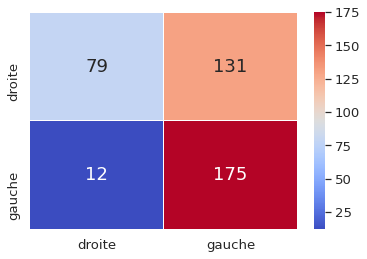

gauche 0.7578686019862491


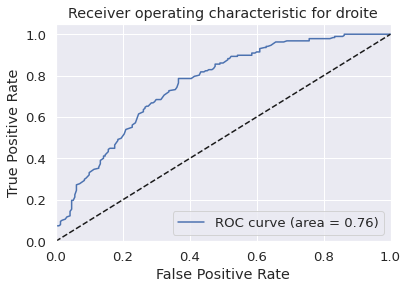

2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of Num

y_score_rfc new shape (2, 779)
              precision    recall  f1-score   support

      droite       0.89      0.38      0.53       312
      gauche       0.70      0.97      0.81       467

    accuracy                           0.73       779
   macro avg       0.79      0.67      0.67       779
weighted avg       0.77      0.73      0.70       779



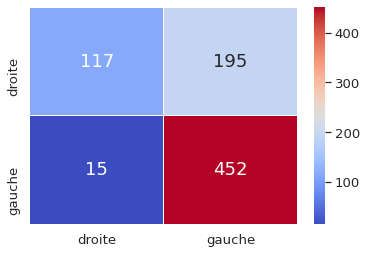

gauche 0.8182136386097842


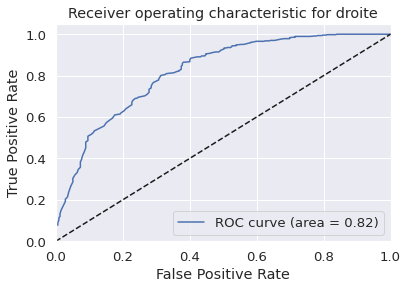

3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of Num

y_score_rfc new shape (2, 490)
              precision    recall  f1-score   support

      droite       0.84      0.53      0.65       266
      gauche       0.61      0.88      0.72       224

    accuracy                           0.69       490
   macro avg       0.73      0.71      0.69       490
weighted avg       0.74      0.69      0.68       490



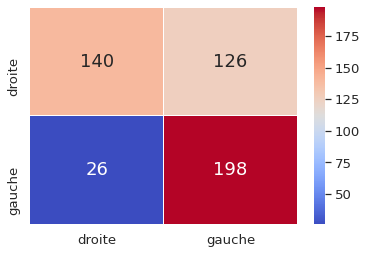

gauche 0.7852947099892588


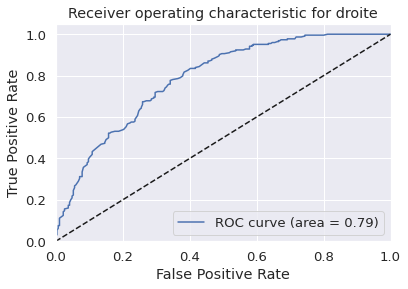

4


In [ ]:
from sklearn.ensemble import RandomForestClassifier
my_lsa_model = []


df_lsa = my_file.loc[my_file.label  != 'LREM']

for i in [0, 2, 3, 4]:
    df_lsa_i = df_lsa.loc[df_lsa['topic label'] == i]
    X = tokenize_url_hashtags_4tweets(df_lsa_i['clean tweet'].array)
    X = [' '.join(x) for x in X]
    y = df_lsa_i.label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    cv = CountVectorizer()
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)

    lb = preprocessing.LabelBinarizer()
    lb_trained = lb.fit(y_train)
    y_train_lb = lb_trained.transform(y_train)
    y_test_lb = lb_trained.transform(y_test)
    rfc = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1, verbose=1)
    rfc.fit(X_train_cv, y_train_lb)

    y_score_rfc = rfc.predict_proba(X_test_cv) # you can also try .predict_log_proba(X_dev_cv)
    y_score_rfc = np.array(y_score_rfc)

    classes_proba = (class_binary_proba for class_binary_proba in y_score_rfc)
    y_score_rfc = np.column_stack(classes_proba)
    print('y_score_rfc new shape', y_score_rfc.shape)

    show_eval(y_test_lb, y_score_rfc[1,:], lb_trained, rfc )
    my_lsa_model.append((rfc,cv))
    print(i)





              precision    recall  f1-score   support

      droite       0.72      0.89      0.80      4067
      gauche       0.87      0.66      0.75      4231

    accuracy                           0.77      8298
   macro avg       0.79      0.78      0.77      8298
weighted avg       0.79      0.77      0.77      8298



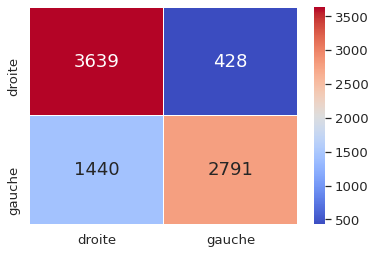

gauche 0.8856764707574505


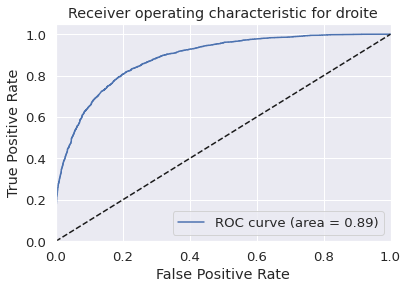

0



              precision    recall  f1-score   support

      droite       0.61      0.93      0.74       210
      gauche       0.81      0.34      0.48       187

    accuracy                           0.65       397
   macro avg       0.71      0.64      0.61       397
weighted avg       0.71      0.65      0.62       397



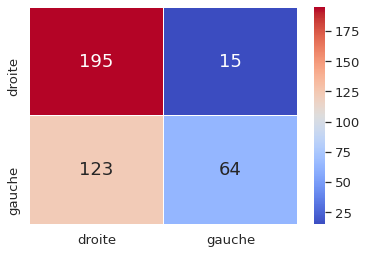

gauche 0.7790934555640439


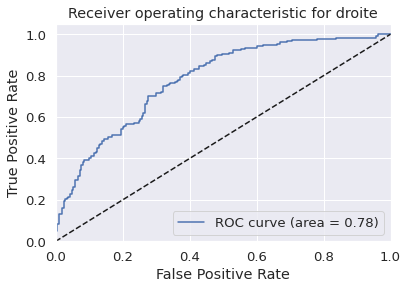

2



              precision    recall  f1-score   support

      droite       0.60      0.91      0.73       312
      gauche       0.91      0.60      0.72       467

    accuracy                           0.72       779
   macro avg       0.76      0.75      0.72       779
weighted avg       0.79      0.72      0.72       779



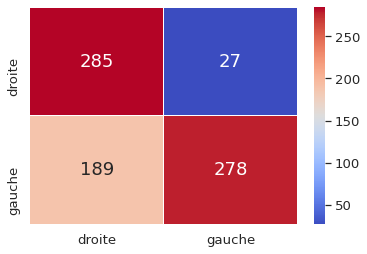

gauche 0.8711771811343547


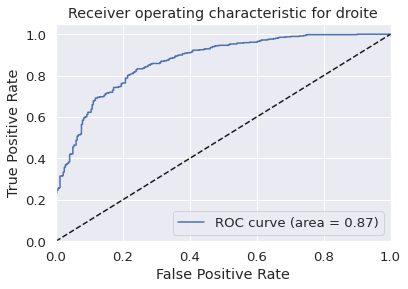

3



              precision    recall  f1-score   support

      droite       0.64      0.95      0.76       266
      gauche       0.86      0.36      0.50       224

    accuracy                           0.68       490
   macro avg       0.75      0.65      0.63       490
weighted avg       0.74      0.68      0.65       490



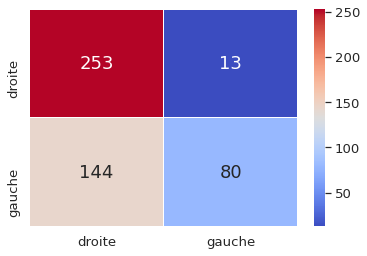

gauche 0.8210425617615467


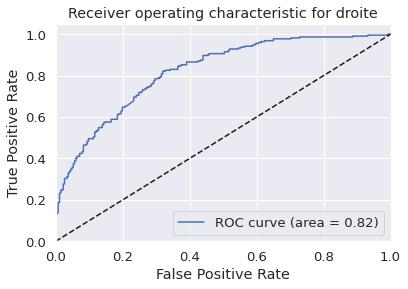

4


In [ ]:
from sklearn import svm
my_lsa_model_svm = []


df_lsa = my_file.loc[my_file.label  != 'LREM']

for i in range(5):
    if i != 1 : # because the topic one is almost empty ...
      df_lsa_i = df_lsa.loc[df_lsa['topic label'] == i]
      X = tokenize_url_hashtags_4tweets(df_lsa_i['clean tweet'].array)
      X = [' '.join(x) for x in X]
      y = df_lsa_i.label
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
      cv = CountVectorizer()
      X_train_cv = cv.fit_transform(X_train)
      X_test_cv = cv.transform(X_test)

      lb = preprocessing.LabelBinarizer()
      lb_trained = lb.fit(y_train)
      y_train_lb = lb_trained.transform(y_train)
      y_test_lb = lb_trained.transform(y_test)
      
      svc = svm.SVC(kernel='linear', probability=True)

      clf_svm = OneVsRestClassifier(svc).fit(X_train_cv, y_train_lb)


      y_score_svm = clf_svm.decision_function(X_test_cv) # you can also try .predict_log_proba(X_dev_cv)

      show_eval(y_test_lb, y_score_svm, lb_trained, clf_svm )
      my_lsa_model_svm.append((clf_svm,cv))
      print(i)


## 4.2. Testing LREM

In [ ]:
df_lsa = my_file.loc[my_file.label == 'LREM']

In [ ]:
X = tokenize_url_hashtags_4tweets(df['clean tweet'].array)
X = [' '.join(x) for x in X]
print(len(X), X[0])


24916 heureuse d ’ soutenu démarche conseillère régionale votant 150 000 € projet escoe …


We print results for some members of the LREM party for each topic :
topic , name, score (close to 0 : 'droite')

In [ ]:
df_lsa.columns

Index(['created_at', 'id', 'text', 'clean tweet', 'label', 'name', 'withheld',
       'topic label'],
      dtype='object')

In [ ]:
my_lsa_model = [my_lsa_model[0], 0, my_lsa_model[1],my_lsa_model[2],my_lsa_model[3]]
# Since topic 1 is empty we do not need any model

In [ ]:
for i in [0, 2, 3, 4]:
    
    rfc,cv = my_lsa_model[i]
    
    for key in df_lsa.name.unique():
        df_lsa_i = df_lsa.loc[(df_lsa['topic label'] == i)]
        df_lsa_i = df_lsa_i.loc[(df_lsa_i.name == key)]
        if len(df_lsa_i) !=0:
          X = tokenize_url_hashtags_4tweets(df_lsa_i['clean tweet'].array)
          X = [' '.join(x) for x in X]
          X = cv.transform(X)
          
          y_score_rfc = rfc.predict(X)
          df_lsa_i['predicted_label'] = y_score_rfc
          print(i,key,df_lsa_i.predicted_label.mean())


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.4s finished


0 EmmanuelMacron 0.45639187574671447


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s


0 GDarmanin 0.4543010752688172


[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.3s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


0 BrunoLeMaire 0.36225596529284165


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.4s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


0 MarleneSchiappa 0.6484375


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.4s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


0 JeanCASTEX 0.4840182648401826


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.3s finished



2 EmmanuelMacron 0.8688524590163934


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


2 GDarmanin 0.8333333333333334



2 BrunoLeMaire 0.8148148148148148


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


2 MarleneSchiappa 0.9666666666666667


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


2 JeanCASTEX 0.9487179487179487


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


3 EmmanuelMacron 0.9125


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


3 GDarmanin 0.7847533632286996



3 BrunoLeMaire 0.9032258064516129


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


3 MarleneSchiappa 0.9431818181818182



3 JeanCASTEX 0.7083333333333334


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.



4 EmmanuelMacron 0.8095238095238095


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


4 GDarmanin 1.0


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


4 BrunoLeMaire 0.8333333333333334


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


4 MarleneSchiappa 0.8846153846153846



4 JeanCASTEX 0.7837837837837838


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


In [ ]:
my_lsa_model_svm = [my_lsa_model_svm[0], 0, my_lsa_model_svm[1],my_lsa_model_svm[2],my_lsa_model_svm[3]]
# Since topic 1 is empty we do not need any model

In [ ]:
for i in [0, 2, 3, 4]:
    svm,cv = my_lsa_model_svm[i]
    for key in df_lsa.name.unique():

        df_lsa_i = df_lsa.loc[(df_lsa['topic label'] == i)]
        df_lsa_i = df_lsa_i.loc[(df_lsa_i.name == key)]
        X = tokenize_url_hashtags_4tweets(df_lsa_i['clean tweet'].array)
        X = [' '.join(x) for x in X]
        X = cv.transform(X)

        y_score_svm = svm.predict(X)
        df_lsa_i['predicted_label'] = y_score_svm
        print(i,key,df_lsa_i.predicted_label.mean())


0 EmmanuelMacron 0.45280764635603343



0 GDarmanin 0.3817204301075269



0 BrunoLeMaire 0.38503253796095444



0 MarleneSchiappa 0.5768229166666666



0 JeanCASTEX 0.4280821917808219



2 EmmanuelMacron 0.6065573770491803



2 GDarmanin 0.4166666666666667



2 BrunoLeMaire 0.4074074074074074



2 MarleneSchiappa 0.7666666666666667



2 JeanCASTEX 0.7435897435897436



3 EmmanuelMacron 0.7



3 GDarmanin 0.5336322869955157



3 BrunoLeMaire 0.6774193548387096



3 MarleneSchiappa 0.7045454545454546



3 JeanCASTEX 0.5625



4 EmmanuelMacron 0.6190476190476191



4 GDarmanin 0.7777777777777778



4 BrunoLeMaire 0.5



4 MarleneSchiappa 0.6153846153846154



4 JeanCASTEX 0.6216216216216216





We can see that the model suffer from unequal distribution of the tweets labelled 'gauche' 'droite' in the database for all topics except for topic 1.

# 5. Deep Learning approach using CamenBERT

In [ ]:
!pip install transformers
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 5.7MB/s 


In [ ]:
import torch
import seaborn
import pandas as pd
from sklearn import metrics
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import CamembertForSequenceClassification, CamembertTokenizer, AdamW
from sklearn import preprocessing

In [ ]:
dataset = pd.read_pickle('./clean_db.pkl')

dataset = dataset.loc[dataset.label != 'LREM']

dataset = dataset.sample(frac=1)

In [ ]:
# Chargement du jeu de donnees
 
reviews = dataset['clean tweet'].values.tolist()
sentiments = dataset['label'].values.tolist()

sentiments = [0 if l == 'droite' else 1 for l in sentiments]
# On charge l'objet "tokenizer"de camemBERT qui va servir a encoder
# 'camebert-base' est la version de camembert qu'on choisit d'utiliser
# 'do_lower_case' à True pour qu'on passe tout en miniscule
TOKENIZER = CamembertTokenizer.from_pretrained(
    'camembert-base',
    do_lower_case=True)
 
# La fonction batch_encode_plus encode un batch de donnees
encoded_batch = TOKENIZER.batch_encode_plus(reviews,
                                            add_special_tokens=True,
                                            padding=True,
                                            truncation=True,
                                            return_attention_mask = True,
                                            return_tensors = 'pt')
 
# On transforme la liste des sentiments en tenseur
sentiments = torch.tensor(sentiments)
 
# On calcule l'indice qui va delimiter nos datasets d'entrainement et de validation
# On utilise 80% du jeu de donnée pour l'entrainement et les 20% restant pour la validation
split_border = int(len(sentiments)*0.8)
 
 
train_dataset = TensorDataset(
    encoded_batch['input_ids'][:split_border],
    encoded_batch['attention_mask'][:split_border],
    sentiments[:split_border])
validation_dataset = TensorDataset(
    encoded_batch['input_ids'][split_border:],
    encoded_batch['attention_mask'][split_border:],
    sentiments[split_border:])
 
 
batch_size = 32
 
# On cree les DataLoaders d'entrainement et de validation
# Le dataloader est juste un objet iterable
# On le configure pour iterer le jeu d'entrainement de façon aleatoire et creer les batchs.
train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size)
 
validation_dataloader = DataLoader(
            validation_dataset,
            sampler = SequentialSampler(validation_dataset),
            batch_size = batch_size)

# On la version pre-entrainee de camemBERT 'base'
model = CamembertForSequenceClassification.from_pretrained(
    'camembert-base',
    num_labels = 2)

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # Learning Rate
                  eps = 1e-8 # Epsilon
                 )
epochs = 3


AttributeError: ignored

L'entrainement de CamenBERT est très très long, cette celulle peut être passée. Le modèle a déjà été entrainé et peut être chargé à la cellule suivante

In [ ]:
"""
# On va stocker nos tensors sur mon cpu : je n'ai pas mieux
device = torch.device("cpu")
 
# Pour enregistrer les stats a chaque epoque
training_stats = []
 
# Boucle d'entrainement
for epoch in range(0, epochs):
     
    print("")
    print(f'########## Epoch {epoch+1} / {epochs} ##########')
    print('Training...')
 
 
    # On initialise la loss pour cette epoque
    total_train_loss = 0
 
    # On met le modele en mode 'training'
    # Dans ce mode certaines couches du modele agissent differement
    model.train()
 
    # Pour chaque batch
    for step, batch in enumerate(train_dataloader):
 
        # On fait un print chaque 40 batchs
        if step % 40 == 0 and not step == 0:
            print(f'  Batch {step}  of {len(train_dataloader)}.')
         
        # On recupere les donnees du batch
        input_id = batch[0].to(device)
        attention_mask = batch[1].to(device)
        sentiment = batch[2].to(device)
 
        # On met le gradient a 0
        model.zero_grad()        
 
        # On passe la donnee au model et on recupere la loss et le logits (sortie avant fonction d'activation)
        loss = model(input_id, 
                             token_type_ids=None, 
                             attention_mask=attention_mask, 
                             labels=sentiment)['loss']
 
        # On incremente la loss totale
        # .item() donne la valeur numerique de la loss
        total_train_loss += loss.item()
 
        # Backpropagtion
        loss.backward()
 
        # On actualise les parametrer grace a l'optimizer
        optimizer.step()
         
        
    # On calcule la  loss moyenne sur toute l'epoque
    avg_train_loss = total_train_loss / len(train_dataloader)   
 
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))  
     
    # Enregistrement des stats de l'epoque
    training_stats.append(
        {
            'epoch': epoch + 1,
            'Training Loss': avg_train_loss,
        }
    )
 
print("Model saved!")
torch.save(model.state_dict(), "./sentiments.pt")
"""

In [ ]:
! wget https://download1639.mediafire.com/wmi20pj2nmtg/0s9qfmvj7vx7tmj/sentiments.pt

model.load_state_dict(torch.load("/content/drive/MyDrive/sentiments.pt"))

--2021-04-24 16:26:37--  https://download1639.mediafire.com/wmi20pj2nmtg/0s9qfmvj7vx7tmj/sentiments.pt
Resolving download1639.mediafire.com (download1639.mediafire.com)... 199.91.152.139
Connecting to download1639.mediafire.com (download1639.mediafire.com)|199.91.152.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.mediafire.com/download_repair.php?flag=4&dkey=wmi20pj2nmt&qkey=0s9qfmvj7vx7tmj&ip=35.237.6.78&ref=3 [following]
--2021-04-24 16:26:37--  http://www.mediafire.com/download_repair.php?flag=4&dkey=wmi20pj2nmt&qkey=0s9qfmvj7vx7tmj&ip=35.237.6.78&ref=3
Resolving www.mediafire.com (www.mediafire.com)... 104.16.203.237, 104.16.202.237
Connecting to www.mediafire.com (www.mediafire.com)|104.16.203.237|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘sentiments.pt’

sentiments.pt           [ <=>                ]  41.00K  --.-KB/s    in 0.01s   

2021-04-24 16:26:37 (3.40 MB/s) - ‘

NameError: ignored

In [ ]:
def preprocess(raw_reviews, sentiments=None):
    encoded_batch = TOKENIZER.batch_encode_plus(raw_reviews,
                                                truncation=True,
                                                pad_to_max_length=True,
                                                return_attention_mask=True,
                                                return_tensors = 'pt')
    if sentiments:
        sentiments = torch.tensor(sentiments)
        return encoded_batch['input_ids'], encoded_batch['attention_mask'], sentiments
    return encoded_batch['input_ids'], encoded_batch['attention_mask']
 
def predict(reviews, model=model):
    with torch.no_grad():
        model.eval()
        input_ids, attention_mask = preprocess(reviews)
        retour = model(input_ids, attention_mask=attention_mask)
         
        return torch.argmax(retour[0], dim=1)



In [ ]:
predictions = predict(reviews[split_border:])
print(metrics.f1_score(sentiments[split_border:], predictions, average='weighted', zero_division=0))
seaborn.heatmap(metrics.confusion_matrix(sentiments[split_border:], predictions))


On retrouve les très bonnes performances du SVM et du RandomForest

Testing LREM


In [ ]:
dataset = pd.read_pickle('clean_db.pkl')

dataset = dataset.loc[dataset.label == 'LREM']

for key in dataset.name.unique():
    data = dataset.loc[dataset.name == key]
    predictions = predict(data['clean tweet'].values.tolist())
    print(key,np.mean(predictions.tolist()))

Unfortunatelly, we have values around 0.5 as in the ML models 